# 다중 회귀 
- 다중의 독립 변수가 존재하는 회귀 분석 
- 여러 개의 독립 변수가 복합적으로 종속 변수에 영향을 미치는 경우 다중 회귀 모형으로 데이터를 예측
- 다중 회귀에서 최적의 모델을 결정하기 위해 여러 가지의 방법이 존재 
- 모델이 복잡해지면 과대적합이 발생할 가능성이 있기 때문에 이를 방지하기 위해 다양한 규제 방식이 존재하고 규제에 따른 모델들이 존재 
    - 모델에서 규제 방식에 따라서 가중치를 제한
    - 독립 변수에서의 가중치가 0이 되는 차원(컬럼 | 피쳐)들이 생성 
    - 규제를 강하게 걸면 가중치의 절대치가 줄어들고 0에 가까워진다. 

## 릿지 
- 최소제곱 적합식의 수축 패널티라 불리는 항에 L2 패널티를 추가한것 

- 매개변수 
    - alpha
        - 기본값 : 1.0
        - 규제의 강도 -> 클수록 회귀 계수가 작아지고 과적합의 방지, 과소적합 위험
        - 해당 모델의 중요한 매개변수
    - solver
        - 기본값 : 'auto'
        - 해를 구하는 방법 
        - 데이터의 크기 / 희소성에 따라 적합한 solver를 선택 
        - 'auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'
            - svd : 특이값 분해, 다중공선성 있고 데이터의 개수가 작거나 중간 정도 
            - cholesky : 정규방정식, 데이터의 개수가 작거나 중간 정도 
            - lsqr : 반복 최소제곱, 대규모 데이터중 희소/밀집 데이터
            - sparse_cg : 공액 기울기법, 대규모 데이터 중 희소 데이터 
            - sag : 확률적 평균 검사, 데이터의 행의 수가 열의 수보다 월등히 많은 경우
            - saga : sag 확장, 대규모 희소, ElasticNet 가능
    - tol
        - 기본값 : 0.001 (1e-03)
        - 수렴의 판단 기준, 작을수록 정밀, 속도적인 면에서 느려질수 있다. 
    - max_iter
        - 기본값 : None
        - 최적화 될때까지 최대 반복 횟수.(데이터 크거나 수치가 불안정 경우에 필요)
    
- 속성 
    - coef_
        - 회귀 계수를 출력 (규제로 인해서 선형 회귀에 비해 값들이 작게 출력)
    - n_iter_
        - solver가 반복한 횟수 출력 


In [1]:
import pandas as pd
import numpy as np
from sklearn.datasets import load_diabetes
from sklearn.linear_model import Ridge
import matplotlib.pyplot as plt

In [2]:
diabetes = load_diabetes()

In [3]:
df = pd.DataFrame(diabetes['data'], columns = diabetes['feature_names'])
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641


In [4]:
alpha = np.logspace(-3, 1, 5)
alpha

array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01])

In [ ]:
# alpha 값에 따라 회귀계수가 어떻게 변화하는가?
# 반복 실행할때 마다 회귀계수를 추가해주는 빈 리스트 
data = []

for a in alpha:
    # print(a)
    # Ridge class 생성 시 alpha 매개변수에 a를 대입
    ridge = Ridge(alpha=a)
    # 모델 학습 
    ridge.fit(df.values, diabetes['target'])
    # 학습 된 모델에서 회귀계수를 출력하여 data에 추가 
    data.append(
        ridge.coef_
    )
data

In [10]:
df_ridge =  pd.DataFrame(data, index = alpha, columns = df.columns)

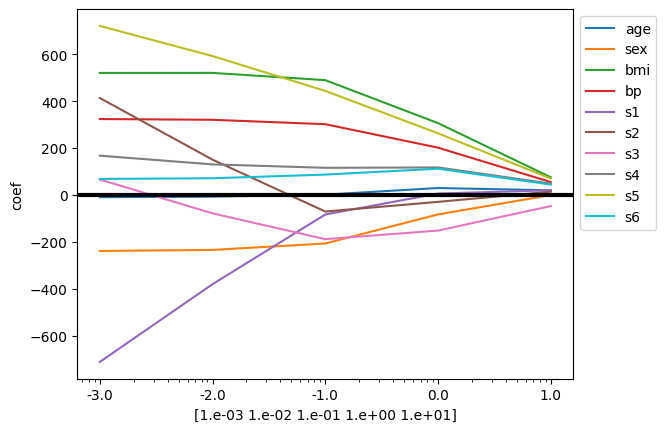

In [19]:
plt.semilogx(df_ridge)
plt.xticks(alpha, labels=np.log10(alpha))
plt.legend(labels=df_ridge.columns, bbox_to_anchor=(1,1))
plt.xlabel(alpha)
plt.ylabel('coef')
plt.axhline(y = 0, color='black', linewidth = 3)

plt.show()

In [20]:
# 단순 선형 회귀와 릿지 회귀 의 회귀 계수를 확인 
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(
    df.values, 
    diabetes['target']
)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


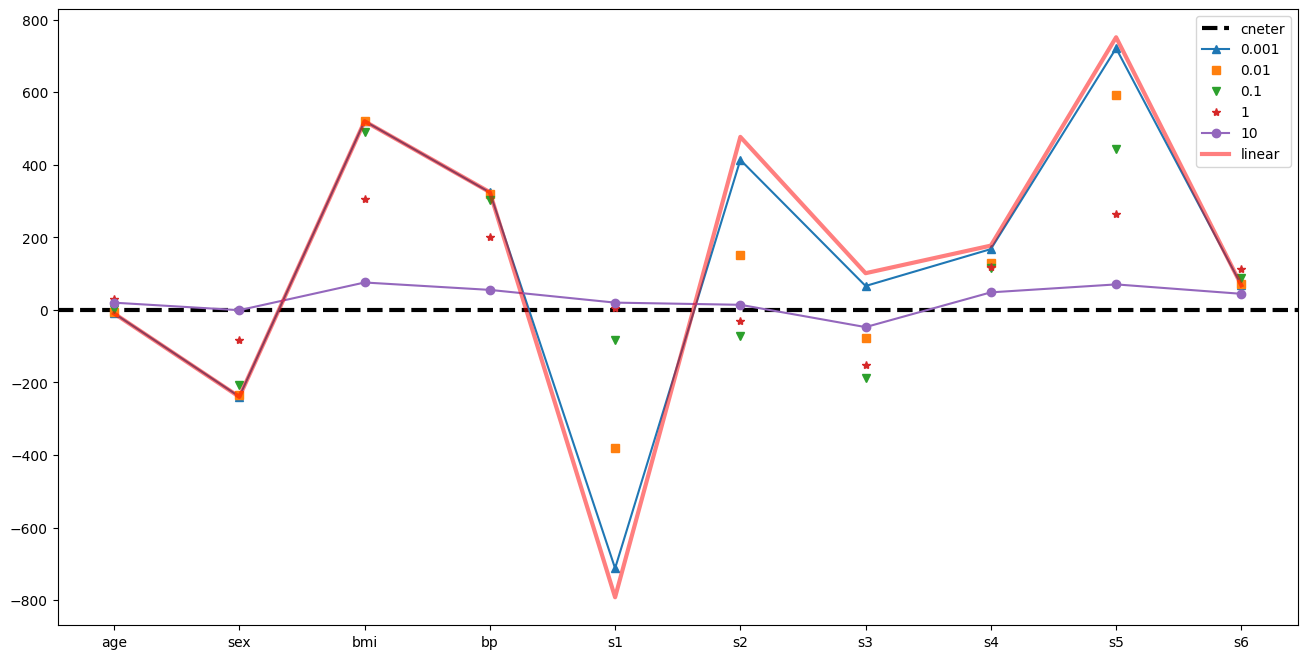

In [36]:
plt.figure(figsize=(16,8))
plt.axhline(y = 0, linestyle = '--', linewidth = 3, color = 'black')
plt.plot(df_ridge.loc[0.001, ], '^-')
plt.plot(df_ridge.loc[0.01, ], 's')
plt.plot(df_ridge.loc[0.1], 'v')
plt.plot(df_ridge.loc[1.0], '*')
plt.plot(df_ridge.loc[10.0], 'o-')
plt.plot(lr.coef_, 'r', linewidth=3, alpha=0.5)
plt.legend( ['cneter', 0.001, 0.01, 0.1, 1, 10, 'linear'], bbox_to_anchor=(1, 1))
plt.show()

- 연습 
    - train과 test의 비율은 8:2로 분할
    - 당뇨 데이터를 이용하여 단순 선형 회귀를 이용하여 학습, 평가를 하여 평가 지표 mse값을 확인하고 
    - 릿지 회귀를 이용하여 alpha 0.01, 0.1, 1 인 경우로 학습, 평가를 하여 평가 지표 mse값을 확인하여 비교 

In [ ]:
# 독립변수, 종속변수 각각 x, y에 대입
x = df.values
y = diabetes['target']

In [39]:
from sklearn.model_selection import train_test_split

In [ ]:
# 독립 변수, 종속 변수 데이터를 train, test로 8:2의 비율이 나눠준다. 
X_train, X_test, Y_train, Y_test = train_test_split(
    x, y, test_size= 0.2 , random_state=42
)

In [ ]:
# 단순 선형 회귀 class를 생성 
lr = LinearRegression()

In [ ]:
# 학습 데이터를 이용하여 모델의 학습
lr.fit(X_train, Y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [ ]:
# 평가 지표를 확인하기 위해 metrics 안에 있는 mse, r2score 로드
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# alpha 값에 따라 모델을 여러개 생성
ridge_1 = Ridge(alpha=0.01)
ridge_2 = Ridge(alpha=0.1)
ridge_3 = Ridge(alpha=1)

In [ ]:
# 생성된 모델에 학습 데이터를 대입하여 학습
ridge_1.fit(X_train, Y_train)
ridge_2.fit(X_train, Y_train)
ridge_3.fit(X_train, Y_train)

,alpha,1
,fit_intercept,True
,copy_X,True
,max_iter,None
,tol,0.0001
,solver,'auto'
,positive,False
,random_state,None


In [ ]:
# 학습한 모델들을 이용하여 예측용 독립 변수를 대입하여 예측 값을 저장 
lr_pred = lr.predict(X_test)
ridge_1_pred = ridge_1.predict(X_test)
ridge_2_pred = ridge_2.predict(X_test)
ridge_3_pred = ridge_3.predict(X_test)

In [ ]:
# MSE -> 오차를 제곱하여 평균을 낸 평가 지표
mse_lr = mean_squared_error(Y_test, lr_pred)
mse_ridge_1 = mean_squared_error(Y_test, ridge_1_pred)
mse_ridge_2 = mean_squared_error(Y_test, ridge_2_pred)
mse_ridge_3 = mean_squared_error(Y_test, ridge_3_pred)

In [48]:
print(round(mse_lr, 2))
print(round(mse_ridge_1, 2))
print(round(mse_ridge_2, 2))
print(round(mse_ridge_3, 2))

2900.19
2882.29
2856.49
3077.42


In [51]:
r2_lr = r2_score(Y_test, lr_pred)
r2_ridge_1 = r2_score(Y_test, ridge_1_pred)
r2_ridge_2 = r2_score(Y_test, ridge_2_pred)
r2_ridge_3 = r2_score(Y_test, ridge_3_pred)

In [59]:
print(round(r2_lr, 4))
print(round(r2_ridge_1, 4))
print(round(r2_ridge_2, 4))
print(round(r2_ridge_3, 4))

0.4526
0.456
0.4609
0.4192


In [56]:
# X_test의 첫번째 인덱스의 값
X_test[0]
# 선형 회귀 계수
lr.coef_
# 절편
lr.intercept_

np.float64(151.34560453985995)

In [57]:
lr_pred[0]

np.float64(139.54755840379616)

In [58]:
# 절편 값을 저장
pred_1 = lr.intercept_
for w, x in zip(lr.coef_, X_test[0]):
    # pred_1에 w와 x를 곱한 값을 누적합 
    pred_1 += (w * x)

pred_1

np.float64(139.54755840379613)